# Problem 2 - KNN hyperparameter tuning using cross validation

## 2.1

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the classifier's performance
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred), 4)
recall = round(recall_score(y_test, y_pred),4)
f1 = round(f1_score(y_test, y_pred), 4)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate misclassification error
misclassification_error = 1 - accuracy

# Print the results
print("Misclassification Error:", misclassification_error)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Misclassification Error: 0.08750000000000002
Accuracy: 0.9125
Precision: 0.92
Recall: 0.8214
F1 Score: 0.8679
Confusion Matrix:
 [[50  2]
 [ 5 23]]


**Answer:**

Using the model from the given article, we built a KNN model with K=4 (4 clusters) and using p=2 which means we are using Euclidean distance. We applied LabelEncoder on our features since our dataset containing character variables. Further, we also scaled our features using StandardScaler for reducing the size to smaller values.

Finally, we used classifier.predict() function to make predictions on the test set using the classifier we built. After this, we calculated different evaluation statistics to see how our model performs. Looking at these statistics, we can see that the model has a low misclassification error, high accuracy, precision, recall and F1 score values which are all indications that our model is performing well. Finally, looking at the confusion matrix we can see that only 7 cases out of 80 were incorrectly classified.

## 2.2

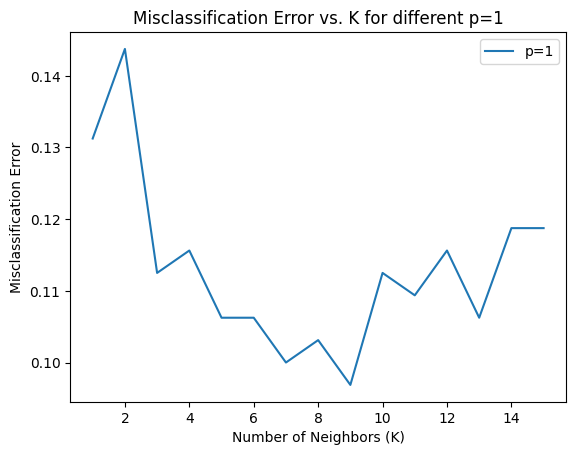

In [29]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#given K values
K_values = range(1, 16)

#lists to store misclassification errors for different values of K
misclassification_errors_p1 = []

for k in K_values:
    knn_classifier_p1 = KNeighborsClassifier(n_neighbors=k, p=1)
    scores_p1 = cross_val_score(knn_classifier_p1, X_train, y_train, cv=5, scoring='accuracy')
    misclassification_errors_p1.append(1 - np.mean(scores_p1)) #we take the mean since we get 5 scores for cv = 5


# Plot misclassification errors for different K values
plt.plot(K_values, misclassification_errors_p1, label="p=1")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Misclassification Error")
plt.legend()
plt.title("Misclassification Error vs. K for different p=1")
plt.show()

**Answer:**

In this part we built our KNN model using p=1, Manhattan distance metric,  with different values for K to see which K gives us lowest misclassification error. We can see that while the error is not exactly linearly decreasing when we increase the number of neighbors, K, we can see that the general trend is that the error is decreasing until it reaches the minimum when K=9 and then it starts rising again as we increase K.

## 2.3

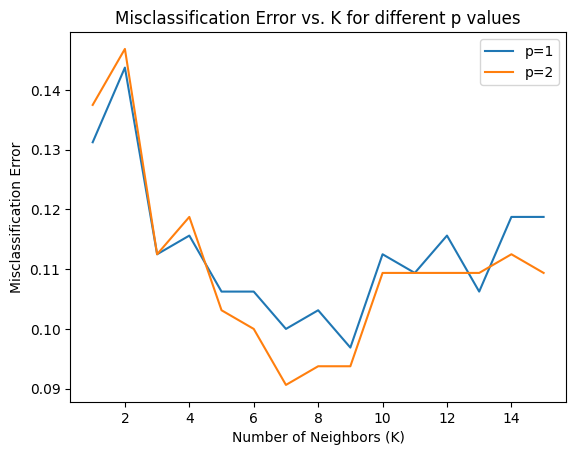

In [23]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#list to store misclassification errors for different values of K
misclassification_errors_p2 = []

for k in K_values:
    #p=2
    knn_classifier_p2 = KNeighborsClassifier(n_neighbors=k, p=2)
    scores_p2 = cross_val_score(knn_classifier_p2, X_train, y_train, cv=5, scoring='accuracy')
    misclassification_errors_p2.append(1 - np.mean(scores_p2))

# Plot misclassification errors for different K values
plt.plot(K_values, misclassification_errors_p1, label="p=1")
plt.plot(K_values, misclassification_errors_p2, label="p=2")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Misclassification Error")
plt.legend()
plt.title("Misclassification Error vs. K for different p values")
plt.show()


**Answer:**

In this part we built our KNN model using p=2, Euclidean distance metric, once again with different values for K to see which K gives us lowest misclassification error. Just like in the case with p=1,we can see that the general trend is that the error is decreasing until it reaches the minimum when K=7 and then it starts rising again as we increase K. When looking at both metrics we can see that in the begining p=1 has lower error for values of K<6 but after that the situation is flipped and the model with p=2 has lower missclassification rate.

## 2.4

In [28]:
for i in range (1,16):
  print(i, "p=1:", round(misclassification_errors_p1[i-1], 4), "p=2:", round(misclassification_errors_p2[i-1],4))

1 p=1: 0.1312 p=2: 0.1375
2 p=1: 0.1438 p=2: 0.1469
3 p=1: 0.1125 p=2: 0.1125
4 p=1: 0.1156 p=2: 0.1188
5 p=1: 0.1062 p=2: 0.1031
6 p=1: 0.1062 p=2: 0.1
7 p=1: 0.1 p=2: 0.0906
8 p=1: 0.1031 p=2: 0.0938
9 p=1: 0.0969 p=2: 0.0938
10 p=1: 0.1125 p=2: 0.1094
11 p=1: 0.1094 p=2: 0.1094
12 p=1: 0.1156 p=2: 0.1094
13 p=1: 0.1062 p=2: 0.1094
14 p=1: 0.1188 p=2: 0.1125
15 p=1: 0.1188 p=2: 0.1094


**Answer:**

As previously mentioned value of K that leads to lowest error when using p=2, Euclidean distance, is 7 and the value of K that elads to lowest error when using p=1, Manhattan distance, is 9. Looking more closesly at the minimal errors, while they are pretty close at 0.0906 for Euclidean distance and 0.0969 for Manhattan distance, we can still conclude that the model that uses Euclidean distnce, p=2, and K = 7 is the best model since it leads to the lowest misclassification error.